In [1441]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from xgboost import XGBRegressor
from sklearn.svm import SVR
# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importing Our Data

In [1442]:
# Load our dataset 
df=pd.read_csv('Gold-USD.csv')

In [1443]:
df.shape

(2088, 2)

In [1444]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  2088
Total number of fields present in the dataset:  2


In [1445]:
df.head()

,Date,Close
0,9/1/2015,"1,142.3"
1,9/2/2015,"1,137.8"
2,9/3/2015,"1,128.0"
3,9/4/2015,"1,118.3"
4,9/7/2015,"1,119.5"


In [1446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2088 non-null   object
 1   Close   2088 non-null   object
dtypes: object(2)
memory usage: 32.8+ KB


In [1447]:
df.describe()

,Date,Close
count,2088,2088
unique,2088,1725
top,9/1/2015,"1,266.5"
freq,1,6


In [1448]:
# Checking for Null Values
print('Null Values:',df.isnull().values.sum())
print('NA values:',df.isnull().values.any())

# If dataset had null values we can use this code to drop all the null values present in the dataset

# df= df.dropna()

Null Values: 0
NA values: False


In [1449]:
# Final shape of the dataset after dealing with null values 

df.shape

(2088, 2)

In [1450]:
# Printing the start date and End date of the dataset
# For our case we have taken data from 1st Sept 2015 to 31th Aug 2023
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)


Starting Date 9/1/2015
Ending Date 8/31/2023


In [1451]:
df["Close"] = df["Close"].str.replace(",","").astype(float)

# Exploratory Data Analysis

# Analysis of Year 2015

In [1452]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # changing to datetime format for simplicity

y_2015 = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] < '2016-01-01')]

#y_2015.drop(y_2015[['Adj Close','Volume']],axis=1)

In [1453]:
# Grouping the data based on the month and finding the mean of opening and closing price for the respective month

monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,NaN
February,NaN
March,NaN
April,NaN
May,NaN
June,NaN
July,NaN
August,NaN
September,1124.554545


In [1454]:
# Visual Representation of the above table
fig = go.Figure()


fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1455]:
# Visualizing all the prices
names = cycle(['Gold Close Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2016

In [1456]:
y_2016 = df.loc[(df['Date'] >= '2016-01-01')
                     & (df['Date'] < '2017-01-01')]

In [1457]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1095.619048
February,1199.928571
March,1244.143478
April,1242.280952
May,1258.654545
June,1276.418182
July,1337.347619
August,1340.139130
September,1326.050000


In [1458]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1459]:
names = cycle(['Gold Close Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2017

In [1460]:
y_2017 = df.loc[(df['Date'] >= '2017-01-01')
                     & (df['Date'] < '2018-01-01')]


In [1461]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1190.518182
February,1234.380000
March,1231.113043
April,1267.510000
May,1246.834783
June,1260.277273
July,1236.242857
August,1282.460870
September,1315.000000


In [1462]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1463]:
names = cycle(['Gold Close Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2018

In [1464]:
y_2018 = df.loc[(df['Date'] >= '2018-01-01')
                     & (df['Date'] < '2019-01-01')]



In [1465]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1329.926087
February,1331.555000
March,1324.645455
April,1334.247619
May,1303.343478
June,1281.600000
July,1238.550000
August,1201.117391
September,1198.495000


In [1466]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1467]:
names = cycle(['Gold Close Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2019

In [1468]:
y_2019 = df.loc[(df['Date'] >= '2019-01-01')
                     & (df['Date'] < '2020-01-01')]


In [1469]:
monthvise= y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1291.208696
February,1320.095000
March,1300.919048
April,1285.486364
May,1283.669565
June,1359.065000
July,1413.004348
August,1499.054545
September,1511.328571


In [1470]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1471]:
names = cycle(['Gold Close Price'])

fig = px.line(y_2019, x=y_2019.Date, y=[y_2019['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2020

In [1472]:
y_2020 = df.loc[(df['Date'] >= '2020-01-01')
                     & (df['Date'] < '2021-01-01')]

In [1473]:
monthvise= y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1558.695652
February,1597.120000
March,1591.945455
April,1682.754545
May,1716.638095
June,1732.250000
July,1843.330435
August,1968.071429
September,1922.240909


In [1474]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1475]:
names = cycle(['Gold Close Price'])

fig = px.line(y_2020, x=y_2020.Date, y=[y_2020['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2021

In [1476]:
y_2021 = df.loc[(df['Date'] >= '2021-01-01')
                     & (df['Date'] < '2021-12-31')]

In [1477]:
monthvise= y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1867.985714
February,1808.205000
March,1718.252174
April,1758.472727
May,1851.404762
June,1834.595455
July,1807.118182
August,1784.659091
September,1777.277273


In [1478]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1479]:
names = cycle(['Gold Close Price'])

fig = px.line(y_2021, x=y_2021.Date, y=[y_2021['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2022

In [1480]:
y_2022 = df.loc[(df['Date'] >= '2022-01-01')
                     & (df['Date'] < '2022-12-31')]


In [1481]:
monthvise= y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1816.276190
February,1856.320000
March,1947.852174
April,1936.719048
May,1851.186364
June,1834.854545
July,1736.390476
August,1765.060870
September,1682.163636


In [1482]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1483]:
names = cycle(['Gold CLose Price'])

fig = px.line(y_2022, x=y_2022.Date, y=[y_2022['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Analysis of Year 2023

In [1484]:
y_2023 = df.loc[(df['Date'] >= '2023-01-01')
                     & (df['Date'] < '2023-09-01')]


In [1485]:
monthvise= y_2023.groupby(y_2023['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1894.795455
February,1854.570000
March,1912.756522
April,2000.585000
May,1988.530435
June,1942.927273
July,1948.876190
August,1919.852174
September,NaN


In [1486]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Gold Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Gold close price')
fig.show()

In [1487]:
names = cycle(['Gold Close Price'])

fig = px.line(y_2023, x=y_2023.Date, y=[y_2023['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Overall Analysis from 2015-2023

In [1488]:
y_overall = df.loc[(df['Date'] >= '2015-09-01')
                     & (df['Date'] <= '2023-09-01')]


In [1489]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Close
Date,
January,1502.218750
February,1523.250932
March,1537.383333
April,1562.886391
May,1557.641011
June,1569.271676
July,1570.898851
August,1590.387222
September,1486.238953


In [1490]:
names = cycle(['Gold Close Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Close']],
             labels={'Date': 'Date','value':'Gold value'})
fig.update_layout(title_text='Gold analysis chart', font_size=15, font_color='black',legend_title_text='Gold Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Building Models and Data pre-processing

First Step is Preparing Data for Training and Testing

In [1491]:
# Lets First Take all the Close Price 
closedf = df[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2088, 2)


In [1492]:
closedf = closedf[closedf['Date'] >= '2015-09-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  2088


In [1493]:
closedf

,Date,Close
0,2015-09-01,1142.3
1,2015-09-02,1137.8
2,2015-09-03,1128.0
3,2015-09-04,1118.3
4,2015-09-07,1119.5
...,...,...
2083,2023-08-25,1915.5
2084,2023-08-28,1915.5
2085,2023-08-29,1930.0
2086,2023-08-30,1947.6


In [1494]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Gold close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

* ### Normalizing Data
- Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.
- MinMaxScaler. For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum. MinMaxScaler preserves the shape of the original distribution.

In [1495]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(2088, 1)


* ### Slicing data into Training set and Testing set

In [1496]:
# we keep the training set as 90% and 10% testing set

training_size=int(len(closedf)*0.75)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (1566, 1)
test_data:  (522, 1)


* ### Now we Transform the Close price based on Time-series-analysis forecasting requirement , Here we will take 15   

In [1497]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [1498]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (1550, 15)
y_train:  (1550,)
X_test:  (506, 15)
y_test (506,)


# XGBoost model

In [1499]:
# Building Model

my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [1500]:
predictions = my_model.predict(X_test)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, predictions)))
print("Mean Squared Error - MSE : " + str(mean_squared_error(y_test, predictions)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, predictions))))

Mean Absolute Error - MAE : 0.01774100495433685
Mean Squared Error - MSE : 0.0006741407960986585
Root Mean squared Error - RMSE : 0.02596422146143917


In [1501]:
train_predict=my_model.predict(X_train)
test_predict=my_model.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (1550, 1)
Test data prediction: (506, 1)


In [1502]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [1503]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict


names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price using XGBoost',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1504]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = my_model.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = my_model.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [1505]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [1506]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 10 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1507]:
my_model=closedf.tolist()
my_model.extend((np.array(lst_output).reshape(-1,1)).tolist())
my_model=scaler.inverse_transform(my_model).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(my_model,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- ## R square score

In [1508]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9999583367181546
Test data R2 score: 0.9263186711277513


# LSTM Model

In [1509]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (1550, 15, 1)
X_test:  (506, 15, 1)


In [1510]:
model=Sequential()
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.add(LSTM(5, input_shape=(None, 1), activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1)) 

model.add(Dense(1))


model.compile(loss="mean_squared_error",optimizer="adam")

In [1511]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=32,verbose=1)

Epoch 1/20
49/49 [==============================] - 1s 5ms/step - loss: 0.3051 - val_loss: 0.3810
Epoch 2/20
 1/49 [..............................] - ETA: 0s - loss: 0.1436

49/49 [==============================] - 0s 3ms/step - loss: 0.0606 - val_loss: 0.0282
Epoch 3/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0408 - val_loss: 0.0278
Epoch 4/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0385 - val_loss: 0.0256
Epoch 5/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0379 - val_loss: 0.0233
Epoch 6/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0318 - val_loss: 0.0216
Epoch 7/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0308 - val_loss: 0.0202
Epoch 8/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0296 - val_loss: 0.0170
Epoch 9/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0268 - val_loss: 0.0163
Epoch 10/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0248 - val_loss: 0.0143
Epoch 11/20
49/49 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.0134
Epoch 12/20
49/49 [==========

- ### Plotting Loss vs Validation loss 

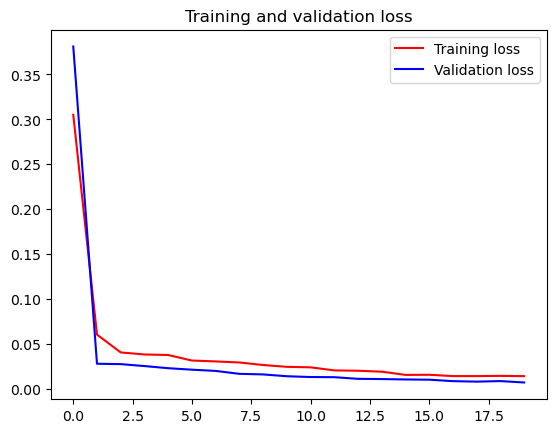

<Figure size 640x480 with 0 Axes>

In [1512]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [1513]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

16/16 [==============================] - 0s 623us/step


((1550, 1), (506, 1))

In [1514]:
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_test, test_predict)))
print("Mean Squared Error - MSE : " + str(mean_squared_error(y_test, test_predict)))
print("Root Mean squared Error - RMSE : " + str(math.sqrt(mean_squared_error(y_test, test_predict))))

Mean Absolute Error - MAE : 0.0386729878725726
Mean Squared Error - MSE : 0.0022277874237423365
Root Mean squared Error - RMSE : 0.047199443044831965


- # Model Evaluation

In [1515]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## R square score

In [1516]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9679388547212222
Test data R2 score: 0.7565103665267952


- # Comparision of original stock close price and predicted close price

In [1517]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1518]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))
print(lst_output)

Output of predicted next days:  30
[[0.8438921570777893], [0.8434730768203735], [0.8442445993423462], [0.8447698950767517], [0.8452469706535339], [0.8459287285804749], [0.8467479944229126], [0.847590982913971], [0.848176121711731], [0.8474719524383545], [0.846684992313385], [0.8459476232528687], [0.8451840877532959], [0.8436576128005981], [0.8411961197853088], [0.838952898979187], [0.8383647203445435], [0.8377361297607422], [0.8369719982147217], [0.8360868692398071], [0.8350885510444641], [0.8339706063270569], [0.832718551158905], [0.8313343524932861], [0.8298313021659851], [0.8282729983329773], [0.8266602158546448], [0.8249853849411011], [0.8232442736625671], [0.8214700818061829]]


In [1519]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


In [1520]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1521]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# Prophet

In [1522]:
import prophet
from prophet import Prophet
# print version number
print('Prophet %s' % prophet.__version__)
df_p = pd.DataFrame()

Prophet 1.1.4


In [1523]:
df_p['ds'] = df[['Date']]
#df_p['y'] = df[['Close']]
df_p['y'] = scaler.fit_transform(np.array(df[['Close']]).reshape(-1,1))
model = Prophet()
model.fit(df_p)

10:13:55 - cmdstanpy - INFO - Chain [1] start processing
10:13:55 - cmdstanpy - INFO - Chain [1] done processing


In [1524]:
future_dates = model.make_future_dataframe(periods=30)

In [1525]:
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
f = forecast['yhat']
g=forecast[forecast['ds']>'2023-08-31']
g=g['yhat']


In [1526]:
predicted_values = forecast['yhat']

squared_differences = (df_p['y'] - predicted_values[:-30]) ** 2

mse = np.mean(squared_differences)

rmse = np.sqrt(mse)
print("Mean Squared Error - MSE : ",mse)
print("Root Mean squared Error - RMSE : ", rmse)

Mean Squared Error - MSE :  0.003126849427880862
Root Mean squared Error - RMSE :  0.055918238776635855


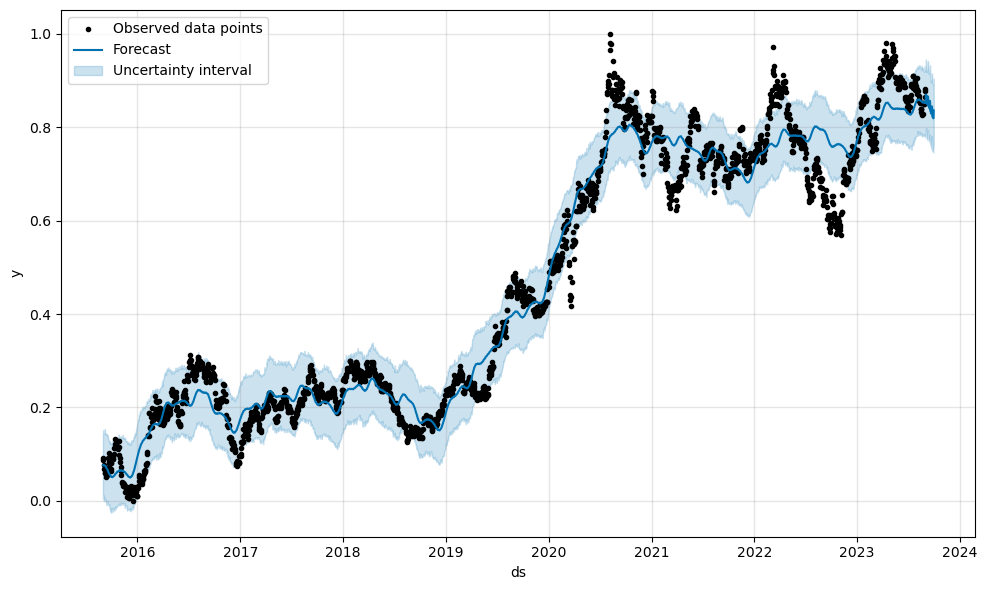

In [1527]:
fig2 = model.plot(forecast, uncertainty=True)
#show legend
plt.legend(loc='upper left')

In [1528]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(g).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [1529]:
names = cycle(['Close price'])

fig = px.line(f,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

- ## R square score for regression

In [1530]:

print("Train data R2 score:", r2_score(predicted_values[:-30], df_p['y']))
#print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.958790413139273


# ARIMA